In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
plt.style.use('default')
import seaborn as sns
sns.set_palette("ch:start=.2,rot=-.3", 13)

In [2]:
D = 8
JzRange = [0.0, 1.0]
lambdaRange = 10.0 ** np.linspace(-6,0,num=13)
betaRange = [1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 20.0]
operators = ['mp', 'pm', 'pz']

In [3]:
# Data Folders
DataFolder = "/data/sliang/CMPO/xxz/spectrum_nnls" 
# Load NNLS Data Files
SwDict = {}
for jz in JzRange:
    for b in betaRange:
        for i in lambdaRange:
            for op in operators:
                key1 = op +"_jz_%.1f_D_%i_beta_%i_lambda_%e" % (jz, D, b, i)
                key2 = op +"_jz_%.1f_D_%im2_beta_%i_lambda_%e" % (jz, D, b, i)
                SwFile1 = "%s/Sw/Jz_%.1f_%s_D_%i_beta_%i_lambda_%e.txt" % (DataFolder, jz, op, D, b, i)
                SwFile2 = "%s/Sw/Jz_%.1f_%s_D_%im2_beta_%i_lambda_%e.txt" % (DataFolder, jz, op, D, b, i)
                SwDict[key1] = np.loadtxt(SwFile1)
                SwDict[key2] = np.loadtxt(SwFile2)
AwDict = {}
for jz in JzRange:
    for b in betaRange:
        for i in lambdaRange:
            for op in operators:
                key1 = op +"_jz_%.1f_D_%i_beta_%i_lambda_%e" % (jz, D, b, i)
                key2 = op +"_jz_%.1f_D_%im2_beta_%i_lambda_%e" % (jz, D, b, i)
                AwFile1 = "%s/Aw/Jz_%.1f_%s_D_%i_beta_%i_lambda_%e.txt" % (DataFolder, jz, op, D, b, i)
                AwFile2 = "%s/Aw/Jz_%.1f_%s_D_%im2_beta_%i_lambda_%e.txt" % (DataFolder, jz, op, D, b, i)
                AwDict[key1] = np.loadtxt(AwFile1)
                AwDict[key2] = np.loadtxt(AwFile2)

In [37]:
def plot_Sw(Jz, beta, dim, operator, laRange = lambdaRange, m2 = False, c = True):
    colors = plb.cm.Blues(np.linspace(0, 1, np.size(laRange) + 1))
    Dict = SwDict

    for i in range(np.size(laRange)):
        la = laRange[i]
        if m2 == False:
            k1 = operator + "_jz_%.1f_D_%i_beta_%i_lambda_%e" % (Jz, dim, beta, la)
            title = r"XXZ Jz=%.1f, D=%i, $\beta$ = %.1f" %(Jz, D, beta)
        else:
            k1 = operator + "_jz_%.1f_D_%im2_beta_%i_lambda_%e" % (Jz, dim, beta, la)
            title = r"XXZ Jz=%.1f, D=%i$\times$2" %(Jz, D)
        if c == True:
            plt.plot(Dict[k1][:,0], Dict[k1][:,1], color = colors[-(i+1)], label=r"$\beta$=%.1f,$\lambda$ = %3e" %(beta,la))
        else:
            plt.plot(Dict[k1][:,0], Dict[k1][:,1], label=r"$\beta$=%.1f,$\lambda$ = %3e" %(beta,la))

    plt.xlabel(r'$\omega$')
    plt.ylabel(r'S($\omega$)')
    plt.xlim(0,5)

    plt.title(title)
    plt.legend()

def plot_Aw(Jz, beta, dim, operator, laRange = lambdaRange, m2 = False):
    colors = plb.cm.Oranges(np.linspace(0, 1, np.size(laRange) + 1))
    Dict = AwDict
    for i in range(np.size(laRange)):
        la = laRange[i]
        if m2 == False:
            k1 = operator + "_jz_%.1f_D_%i_beta_%i_lambda_%e" % (Jz, dim, beta, la)
            title = r"XXZ Jz=%.1f, D=%i, $\beta$ = %.1f" %(Jz, D, beta)
        else:
            k1 = operator + "_jz_%.1f_D_%im2_beta_%i_lambda_%e" % (Jz, dim, beta, la)
            title = r"XXZ Jz=%.1f, D=%i$\times$2" %(Jz, D)
        xdata =  Dict[k1][2:,0]
        ydata =  Dict[k1][2:,1]/(1.0 - np.exp(-beta * xdata))
        plt.plot(xdata, ydata, "--", color = colors[-(i+1)], label=r"$\beta$=%.1f,$\lambda$ = %3e" %(beta,la))

    plt.xlabel(r'$\omega$')
    plt.ylabel(r'S($\omega$)')
    plt.xlim(0,5)

    plt.title(title)
    plt.legend()


In [39]:
print(lambdaRange)

[1.00000000e-06 3.16227766e-06 1.00000000e-05 3.16227766e-05
 1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00]


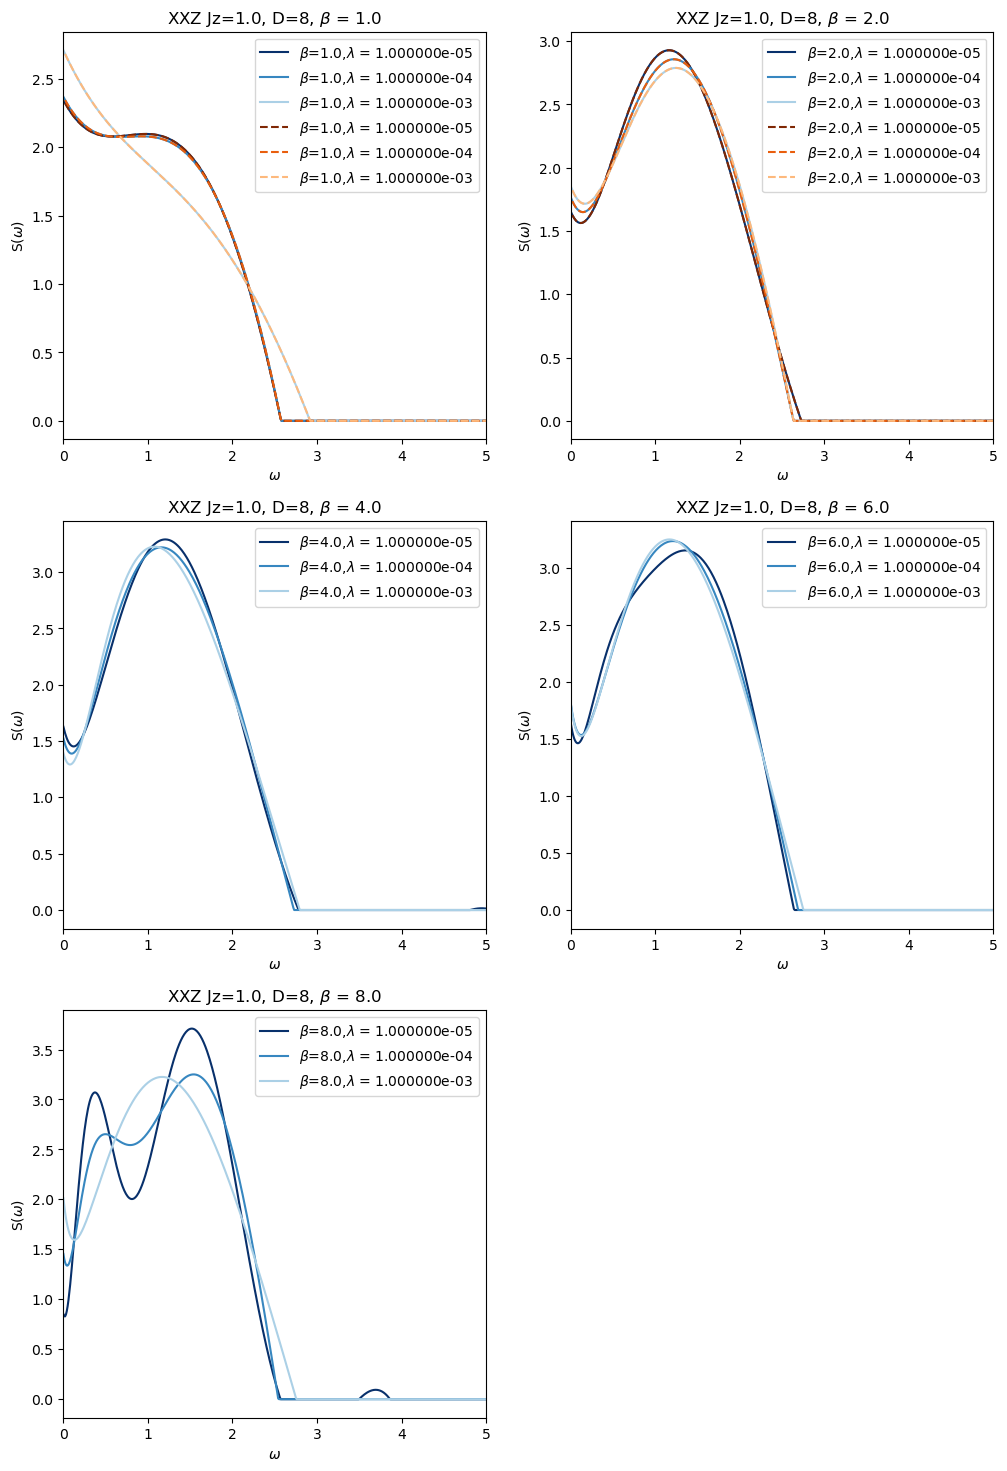

In [42]:
fh = 3; fw = 2
jz = 1.0
r  = lambdaRange[2:8:2]
plt.figure(figsize=(fw*6, fh*6))
plt.subplot(fh,fw,1)
plot_Sw(jz, 1., D, 'pz', laRange = r)
plot_Aw(jz, 1., D, 'pz', laRange = r)
plt.subplot(fh,fw,2)
plot_Sw(jz, 2., D, 'pz', laRange = r)
plot_Aw(jz, 2., D, 'pz', laRange = r)
plt.subplot(fh,fw,3)
plot_Sw(jz, 4., D, 'pz', laRange = r)
#plot_Aw(jz, 6., D, 'pz', laRange = r)
plt.subplot(fh,fw,4)
plot_Sw(jz, 6., D, 'pz', laRange = r)
#plot_Aw(jz, 10., D, 'pz', laRange = r)
plt.subplot(fh,fw,5)
plot_Sw(jz, 8., D, 'pz', laRange = r)
#plot_Aw(jz, 20., D, 'pz', laRange = r)


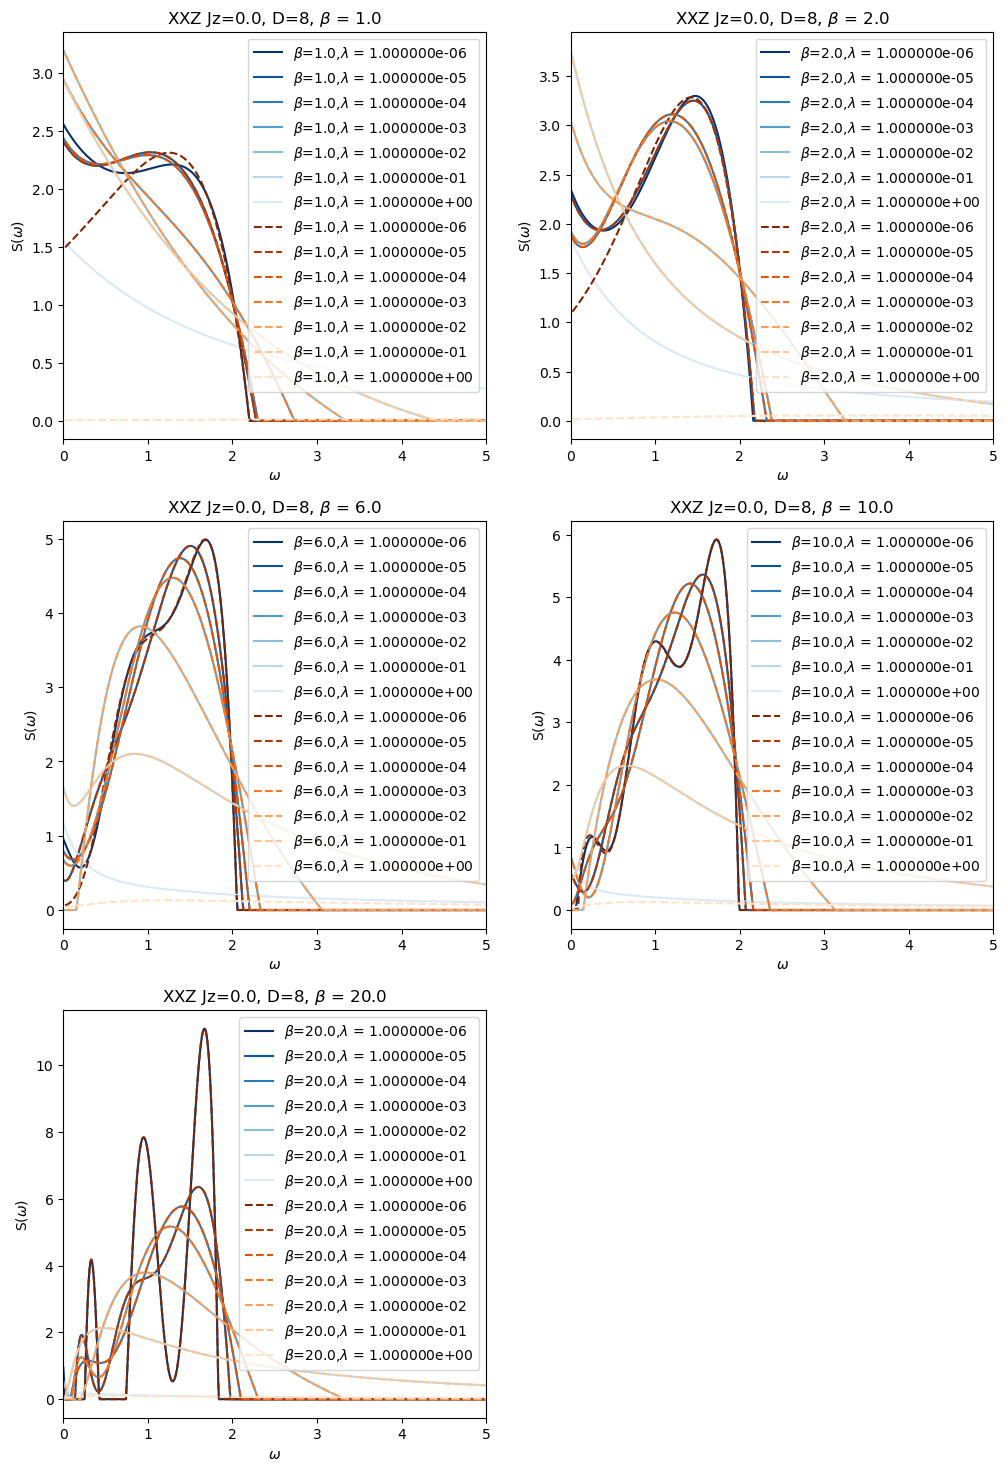

In [35]:
fh = 3; fw = 2
jz = 0.0
plt.figure(figsize=(fw*6, fh*6))
plt.subplot(fh,fw,1)
plot_Sw(jz, 1., D, 'pz', laRange = lambdaRange[0::2])
plot_Aw(jz, 1., D, 'pz', laRange = lambdaRange[0::2])
plt.subplot(fh,fw,2)
plot_Sw(jz, 2., D, 'pz', laRange = lambdaRange[0::2])
plot_Aw(jz, 2., D, 'pz', laRange = lambdaRange[0::2])
plt.subplot(fh,fw,3)
plot_Sw(jz, 6., D, 'pz', laRange = lambdaRange[0::2])
plot_Aw(jz, 6., D, 'pz', laRange = lambdaRange[0::2])
plt.subplot(fh,fw,4)
plot_Sw(jz, 10., D, 'pz', laRange = lambdaRange[0::2])
plot_Aw(jz, 10., D, 'pz', laRange = lambdaRange[0::2])
plt.subplot(fh,fw,5)
plot_Sw(jz, 20., D, 'pz', laRange = lambdaRange[0::2])
plot_Aw(jz, 20., D, 'pz', laRange = lambdaRange[0::2])

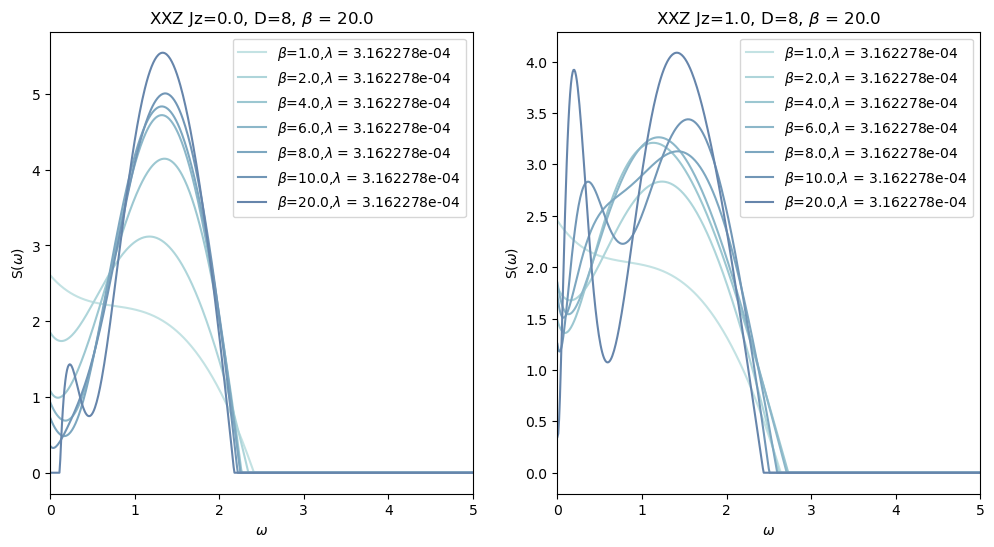

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
for b in betaRange:
    plot_Sw(0.0, b, D, 'pz', laRange=lambdaRange[5:6], c=False)

plt.subplot(122)
for b in betaRange:
    plot_Sw(1.0, b, D, 'pz', laRange=lambdaRange[5:6], c=False)